# introduction

There are many different ways to explore topics within a corpus of text - or rather, many different ways of using the most common approach, LDA, to explore topics within a corpus of text. Here I'm interested to see what kinds of topics, and in what kinds of way, and change over time, in MSUDAI participants' project blog posts. In particular, I was originally motivated to see if and how folks discussed 'fails' in their work. 

Below, I'm using some of [Ben Marwick's code](https://github.com/benmarwick/dayofarchaeology) from his analysis of the Day of Archaeology blog posts from a few years back. This choice is dictated because I liked how Ben compared change in topics over two years' of blog posts. (See, I'm usually able to repurpose someone else's code, but I still struggle to write my own stuff _ex nihilo_). 

So, let's get things set up:

In [15]:
require(mallet)
require(rJava)

Now we load the blog text up and do some preprocessing. My input text has each blog post on its own row, with columns for id, author, and year separated out by comma.

In [16]:
blogtext <- read.csv("blogtext-for-topics.csv", stringsAsFactors = FALSE)
documents <- data.frame(text = blogtext$text,
                        id =   make.unique(blogtext$author),
                        class = blogtext$year, 
                        stringsAsFactors=FALSE)
mallet.instances <- mallet.import(documents$id, documents$text, "en.txt", token.regexp = "\\p{L}[\\p{L}\\p{P}]+\\p{L}")


So, we've loaded up the documents, and then pushed them into a mallet.instances object. Now we'll start fitting a topic model to it. Let's go with 25 topics (as a guess), and start setting up some parameters. (Comments in the code below are by Marwick).

In [17]:
n.topics <- 30
topic.model <- MalletLDA(n.topics)

In [18]:
topic.model$loadDocuments(mallet.instances)

## Get the vocabulary, and some statistics about word frequencies.
##  These may be useful in further curating the stopword list.
vocabulary <- topic.model$getVocabulary()
word.freqs <- mallet.word.freqs(topic.model)


Now we train the model.

In [19]:
## Optimize hyperparameters every 20 iterations, 
##  after 50 burn-in iterations.
topic.model$setAlphaOptimization(20, 50)



In [20]:
## Now train a model. Note that hyperparameter optimization is on, by default.
##  We can specify the number of iterations. Here we'll use a large-ish round number.
topic.model$train(1000)

In [21]:
## run through a few iterations where we pick the best topic for each token, 
##  rather than sampling from the posterior distribution.
topic.model$maximize(10)

In [22]:
## Get the probability of topics in documents and the probability of words in topics.
## By default, these functions return raw word counts. Here we want probabilities, 
##  so we normalize, and add "smoothing" so that nothing has exactly 0 probability.
doc.topics <- mallet.doc.topics(topic.model, smoothed=T, normalized=T)
topic.words <- mallet.topic.words(topic.model, smoothed=T, normalized=T)

In [23]:
# from http://www.cs.princeton.edu/~mimno/R/clustertrees.R
## transpose and normalize the doc topics
topic.docs <- t(doc.topics)
topic.docs <- topic.docs / rowSums(topic.docs)

Now we have a topic model for however many topics we defined above in `n.topics` fitted against the blogposts. Let's take a look. (In the code below, do you see what to change in order to see a more or less top words for each topic?) 

In [24]:
topics.labels <- rep("", n.topics)
for (topic in 1:n.topics) topics.labels[topic] <- paste(mallet.top.words(topic.model, topic.words[topic,], num.top.words=6)$words, collapse=" ")
# have a look at keywords for each topic
topics.labels

[1] "tour otp used story include portion"                       
 [2] "maps github peninsula mapbox taraco bootleaf"              
 [3] "heritage history narrative pocumtuck fort teaching"        
 [4] "methods mortuary scholars study cemetery kingdom"          
 [5] "project archaeology site archaeological research institute"
 [6] "fort collections snelling historic open mnhs"              
 [7] "content i'm website i've month text"                       
 [8] "magic mountain platform collection community crowdsourcing"
 [9] "data open field want issues file"                          
[10] "kobo toolbox database collection tools qgis"               
[11] "new tools technologies world took practice"                
[12] "data i’m identity catalog i’ve dissertation"               
[13] "map mapbox information place way csv"                      
[14] "web style page attachment width pages"                     
[15] "gis underwater maya digital cartodb site"                  
[16] "database copper software northern nunaliit forward"        
[17] "website adobe lab collections muse design"                 
[18] "artifacts room jungle grad machine bags"                   
[19] "fort rosalie natchez french unity period"                  
[20] "map cemeteries historical world monuments work"            
[21] "rock cave photos website early appearance"                 
[22] "digital data database access archaeologists doing"         
[23] "cherokee people history repository daily historic"         
[24] "process creative dai public blog style"                    
[25] "work time like working make using"                         
[26] "ghana community banda meeting university we’ve"            
[27] "ceiling monuments it’s crosses spreadsheet cappadocian"    
[28] "i’m agency repository got reports material"                
[29] "island catalina eagles nest lodge images"                  
[30] "virtual national bone museum tools park"


## examining what we've got

Let's say that I've decided that 'fail' is too nebulous an idea to look for, and reframe it instead as an interest in knowing how the _learning process_ is going for our MSUDAI participants. There are a few topics that look like they're in that ballpark:

+ 'process creative dai public blog style'(topic 24)
+ 'work time like working make using' (topic 25)
+ 'content i'm website i've month text' (topic 7)
+ 'new tools technologies world took practice' (topic 11)

Your interpretation might vary, of course, on what these bags of words actually imply. It could be that `data i'm identity catalog i've dissertation` should be on this list too. Most of the other topics are all seemingly very research-area specific, which is to be expected of such a varied collection of scholars. (At this point, one would normally re-run the topic model with more or less topics, until one ended up with a model that seems to best capture the variability within the corpus. For today's purposes, let's assume that 30 topics captures the nuance without occluding the lesser topics too much).

Let's take a quick look at how the topics relate to one another:

Warning message:
In graphics:::plotHclust(n1, merge, height, order(x$order), hang, : conversion failure on 'data i’m identity catalog i’ve dissertation' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In graphics:::plotHclust(n1, merge, height, order(x$order), hang, : conversion failure on 'data i’m identity catalog i’ve dissertation' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In graphics:::plotHclust(n1, merge, height, order(x$order), hang, : conversion failure on 'data i’m identity catalog i’ve dissertation' in 'mbcsToSbcs': dot substituted for <99>Warning message:
In graphics:::plotHclust(n1, merge, height, order(x$order), hang, : conversion failure on 'data i’m identity catalog i’ve dissertation' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In graphics:::plotHclust(n1, merge, height, order(x$order), hang, : conversion failure on 'data i’m identity catalog i’ve dissertation' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In graphics::

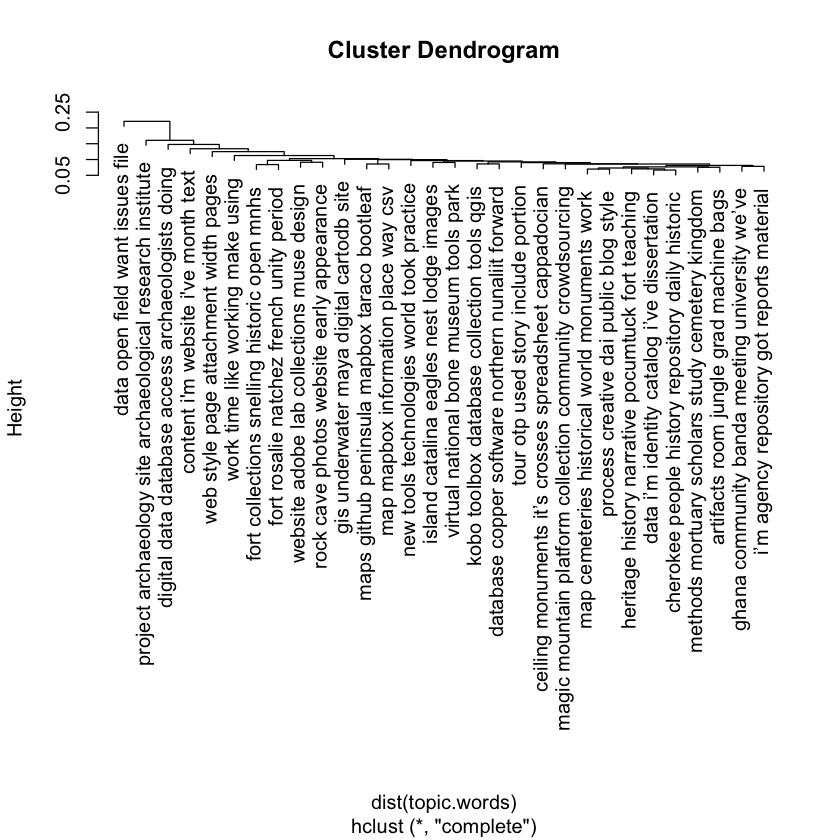

In [26]:
## cluster based on shared words
plot(hclust(dist(topic.words)), labels=topics.labels)

Alright. That's not a particularly illuminating dendrogram. I'll need to rejig that. If it was a bit clearer, it might give insight into how those topics I identified above are related to some of the others. (I invite you to download this notebook and to play with the code yourself to improve this).

## exploring topics over a single author's posts

Let's see how have topics changed over the 12 months since MSUDAI started. We can do this by individual author. Let's look at Katherine's writings first.

In [27]:
# create data.frame with columns as authors and rows as topics
topic_docs <- data.frame(topic.docs)
names(topic_docs) <- documents$id

In [28]:
df1 <- t(topic_docs[,grep("katherine_cook", names(topic_docs))])
colnames(df1) <- topics.labels
require(reshape2)
topic.proportions.df <- melt(cbind(data.frame(df1),
                                   document=factor(1:nrow(df1))),
                             variable.name="topic",
                             id.vars = "document") 

Loading required package: reshape2


Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

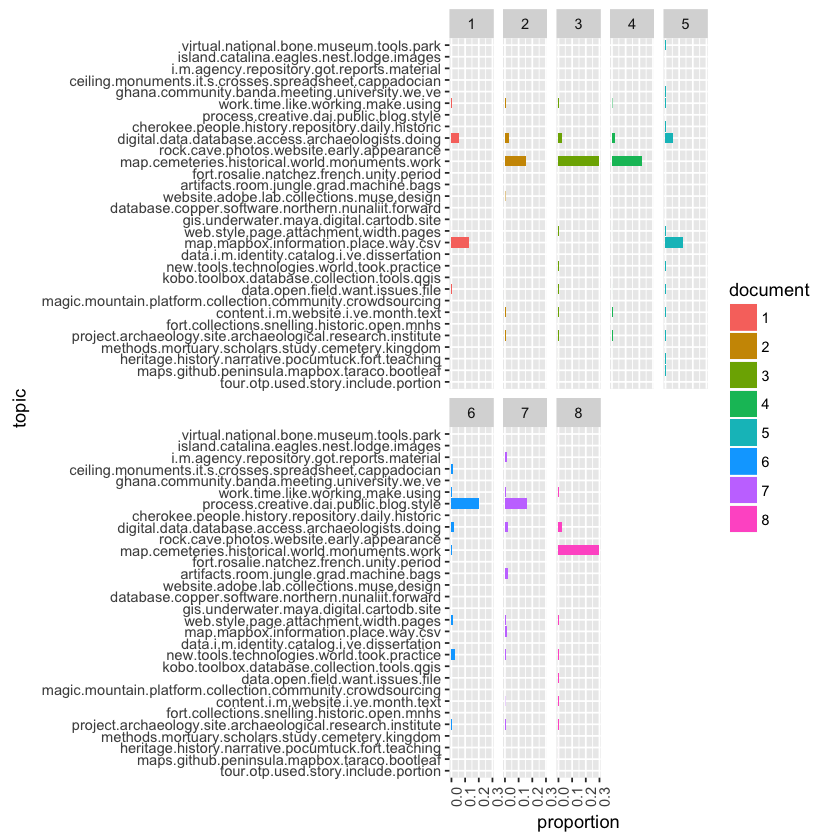

In [29]:
# plot for each doc by that author
require(ggplot2)
ggplot(topic.proportions.df, aes(topic, value, fill=document)) +
  geom_bar(stat="identity") +
  ylab("proportion") +
  theme(axis.text.x = element_text(angle=90, hjust=1)) +  
  coord_flip() +
  facet_wrap(~ document, ncol=5)

Katherine does really neat work on historic cemeteries. Over eight posts, you can see how she moves from initial questions about mapping and databases to the nitty-gritty of mapping, finishing up by considering the public face of such work. In post 6, there's a hint of discourse around `new tools`. If you re-run my code, you can examine the csv file for other author handles and substitute them for Katherine. 

Let's see how the cohort's blogging itself changes over time. First, we have to do some data munging (again, comments are Marwick's):

In [30]:
topic_docs_t <- data.frame(t(topic_docs))
topic_docs_t$year <- documents$class
# now we have a data frame where each row is a topic and 
# each column is a document. The cells contain topic 
# proportions. The next line computes the average proportion of
# each topic in all the posts in a given year. Note that in 
# topic_docs_t$year there is one FALSE, which dirties the data
# slightly and causes warnings
df3 <- aggregate(topic_docs_t, by=list(topic_docs_t$year), FUN=mean)
# this next line transposes the wide data frame created by the above
# line into a tall data frame where each column is a year. The 
# input data frame is subset using the %in% function 
# to omit the last row because this
# last row is the result of the anomalous FALSE value that 
# is in place of the year for one blog post. This is probably
# a result of a glitch in the blog page format. I also exclude
# the last column because it has NAs in it, a side-effect of the
# aggregate function above. Here's my original line:
# df3 <- data.frame(t(df3[-3,-length(df3)]), stringsAsFactors = FALSE)
# And below is an updated version that generalises this in case 
# you have more than two years:
years <- sort(as.character(na.omit(as.numeric(as.character(unique(topic_docs_t$year))))))
df3 <- data.frame(t(df3[(df3$Group.1 %in% years),-length(df3)]), stringsAsFactors = FALSE)
# now we put on informative column names
# names(df3) <- c("y2012", "y2013")
# Here's a more general version in case you have more than two years
# or different years to what I've got:
names(df3) <- unname(sapply(years, function(i) paste0("y",i)))
# the next line removes the first row, which is just the years
df3 <- df3[-1,]
# the next line converts all the values to numbers so we can 
# work on them
df3 <- data.frame(apply(df3, 2, as.numeric, as.character))
df3$topic <- 1:n.topics

Now, before we go any further, a reminder of the topics we've got:

1 "tour otp used story include portion"
2 "maps github peninsula mapbox taraco bootleaf"
3 "heritage history narrative pocumtuck fort teaching"
4 "methods mortuary scholars study cemetery kingdom"
5 "project archaeology site archaeological research institute"
6 "fort collections snelling historic open mnhs"
7 "content i'm website i've month text"
8 "magic mountain platform collection community crowdsourcing"
9 "data open field want issues file"
10 "kobo toolbox database collection tools qgis"
11 "new tools technologies world took practice"
12 "data i’m identity catalog i’ve dissertation"
13 "map mapbox information place way csv"
14 "web style page attachment width pages"
15 "gis underwater maya digital cartodb site"
16 "database copper software northern nunaliit forward"
17 "website adobe lab collections muse design"
18 "artifacts room jungle grad machine bags"
19 "fort rosalie natchez french unity period"
20 "map cemeteries historical world monuments work"
21 "rock cave photos website early appearance"
22 "digital data database access archaeologists doing"
23 "cherokee people history repository daily historic"
24 "process creative dai public blog style"
25 "work time like working make using"
26 "ghana community banda meeting university we’ve"
27 "ceiling monuments it’s crosses spreadsheet cappadocian"
28 "i’m agency repository got reports material"
29 "island catalina eagles nest lodge images"
30 "virtual national bone museum tools park"

Now: let's compare the years.

In [31]:
# which topics differ the most between the years? 

# If you have 
# more than two years you will need to do things differently
# by adding in some more pairwise comparisons. Here is one 
# pairwise comparison:
df3$diff <- df3[,1] - df3[,2] 
df3[with(df3, order(-abs(diff))), ]

,y2015,y2016,topic,diff
4,0.02298076,0.003697348,4,0.01928341
23,0.02218405,0.003981887,23,0.01820216
11,0.02070067,0.004511667,11,0.016189
20,0.02035697,0.004634414,20,0.01572256
29,0.02032483,0.004645894,29,0.01567894
13,8.71533e-05,0.01187364,13,-0.01178648
18,0.0001236061,0.01186062,18,-0.01173701
8,0.01699326,0.005835741,8,0.01115752
24,0.0006487244,0.01167307,24,-0.01102435
30,0.01600762,0.006187756,30,0.009819859


There's a lot to see here but the table is arranged from greatest to least (and note that while some topics decrease, others increase). I like that topic 11, `new tools technologies world took practice` has decreased over time; I take that as a sign of folks getting more comfortable with all this digital stuff. But sometimes, a nice visual would be better: 

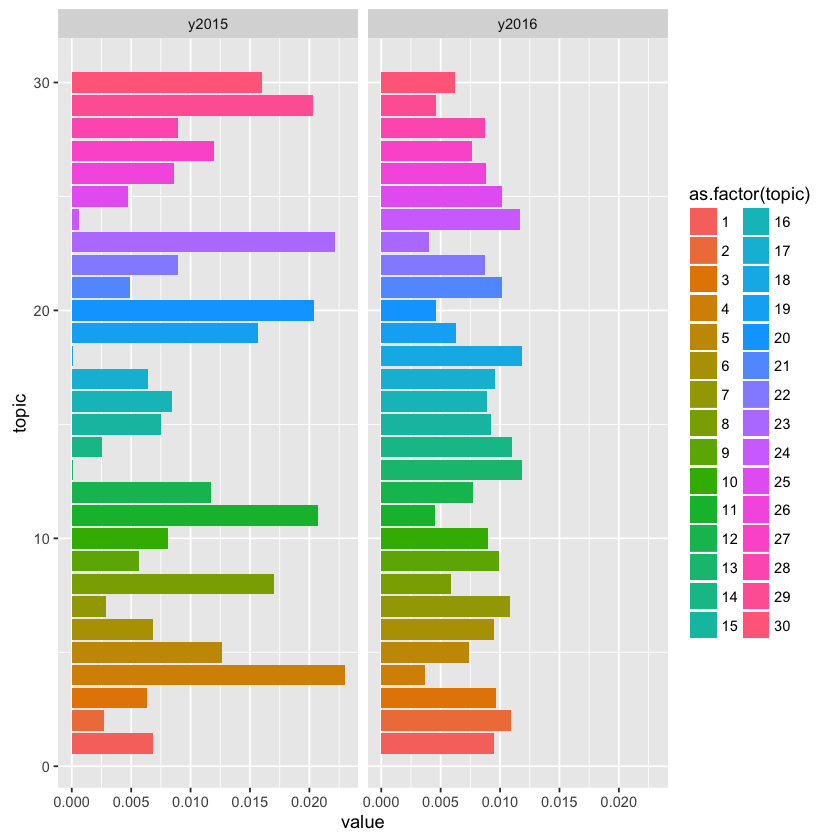

In [32]:
library(reshape2)
# we reshape from long to very long! and drop the 
# 'diff' column that we computed above by using a negatve 
# index, that's the -4 in the line below. You'll need to change
# that value if you have more than two years, you might find
# replacing it with -ncol(df3) will do the trick, if you just
# added one diff column. 
df3m <- melt(df3[,-4], id = 3)
ggplot(df3m, aes(fill = as.factor(topic), topic, value)) +
  geom_bar(stat="identity") +
  coord_flip()  +
  facet_wrap(~ variable)

I'll leave it to the reader to explore these differences and reflect on their meanings. 24, 25, 7, and 11 were the topics that I identified earlier as being (probably) related to ideas of 'fail' and getting past imposter syndrome, of getting comfortable with digital archaeology. What do you think? What should we make of their seeming _increase_?

## who writes like whom?

We can also see which authors are most similar in the distribution of topics:

In [33]:
library(cluster)
topic_df_dist <-  as.matrix(daisy(t(topic_docs), metric =  "euclidean", stand = TRUE))
# Change row values to zero if less than row minimum plus row standard deviation
# keep only closely related documents and avoid a dense spagetti diagram 
# that's difficult to interpret (hat-tip: http://stackoverflow.com/a/16047196/1036500)
topic_df_dist[ sweep(topic_df_dist, 1, (apply(topic_df_dist,1,min) + apply(topic_df_dist,1,sd) )) > 0 ] <- 0

###05
#' Use kmeans to identify groups of similar authors

km <- kmeans(topic_df_dist, n.topics)
# get names for each cluster
allnames <- vector("list", length = n.topics)
for(i in 1:n.topics){
  allnames[[i]] <- names(km$cluster[km$cluster == i])
} 

# Here's the list of authors by group
allnames

Warning message:
: package ‘cluster’ was built under R version 3.2.5

[[1]]
[1] "katherine_cook.5" "katherine_cook.6"

[[2]]
[1] "jolene_smith.5" "jolene_smith.6"

[[3]]
[1] "jolene_smith"   "jolene_smith.1" "jolene_smith.2"

[[4]]
[1] "stovele" "elisem" 

[[5]]
[1] "sarahmrowe"   "sarahmrowe.1"

[[6]]
[1] "michelekoons"   "ngupta.2"       "michelekoons.1" "voelkerj1.2"   

[[7]]
[1] "alimcmichael.1"

[[8]]
[1] "ann_stahl.2"

[[9]]
[1] "pike3"   "pike3.1" "pike3.3" "pike3.4"

[[10]]
[1] "alexparsons.2"

[[11]]
[1] "alimcmichael.2" "perrym.1"      

[[12]]
[1] "alexparsons"   "alexparsons.1"

[[13]]
[1] "hmckill.5"

[[14]]
[1] "alimcmichael"   "alimcmichael.3" "alimcmichael.4"

[[15]]
[1] "alimcmichael.5"

[[16]]
[1] "brightlisa"

[[17]]
[1] "katherine_cook.1" "katherine_cook.2" "katherine_cook.7"

[[18]]
[1] "jolene_smith.3"

[[19]]
[1] "ann_stahl"   "ann_stahl.3" "voelkerj1.3"

[[20]]
[1] "sarahmrowe.4"

[[21]]
[1] "marylennon"    "apeles.2"      "alexparsons.3" "alexparsons.5"

[[22]]
[1] "pike3.5"

[[23]]
[1] "perrym"   "ngupta"   "ngupta.1" "ngupta.3" "ngupta.4"

[[24]]
[1] "scamp"   "scamp.1" "scamp.2" "scamp.3" "scamp.4"

[[25]]
 [1] "katherine_cook"      "maria_bruno"         "blank"              
 [4] "ann_stahl.1"         "katy_meyers_emery"   "hmckill"            
 [7] "ben_carter"          "katy_meyers_emery.1" "voelkerj1"          
[10] "voelkerj1.1"         "wteeter"             "hmckill.3"          
[13] "thilliard"           "ben_carter.1"        "ethan_watrall"      
[16] "teeter"              "jolene_smith.4"      "ksampec"            
[19] "katherine_cook.4"    "thilliard.1"         "thilliard.2"        
[22] "apeles"              "beth_smith"          "apeles.1"           
[25] "ben_carter.2"        "maria_bruno.1"       "stovele.1"          
[28] "wteeter.1"           "beth_smith.2"        "pike3.2"            
[31] "thilliard.3"         "blank.1"             "blank.2"            
[34] "hmckill.6"           "michelekoons.2"      "alexparsons.4"      
[37] "sarahmrowe.2"        "sarahmrowe.3"        "thilliard.4"        
[40] "maria_bruno.2"       "maria_bruno.3"      

[[26]]
[1] "katherine_cook.3"

[[27]]
[1] "hmckill.1" "hmckill.2" "hmckill.4"

[[28]]
[1] "kateellenberger"   "kateellenberger.1" "kateellenberger.2"
[4] "kateellenberger.3" "kateellenberger.4" "kateellenberger.5"

[[29]]
[1] "beth_smith.1" "beth_smith.3" "beth_smith.4"

[[30]]
[1] "nancyhoffman"   "nancyhoffman.1" "nancyhoffman.2" "nancyhoffman.3"
[5] "nancyhoffman.4"

The appended numbers to individuals' names indicates the second, the third, the fourth posts by those authors (ie sgraham.1 is actually sgraham's _second_ post, since we begin counting at 0 and don't show the 0). One could also take these groups and use them as the basis of a network visualization. For me, the most interesting group here is 4, 6, 19, 21 and 25. Go read those posts. How are they alike? How do they differ? Grab this notebook and the underlying data by forking this repository, and fit those usernames into code block 29 to visualize these differences.

## conclusion

This quick example shows ways of examining the output of a topic model in order to explore various aspects of the participants' evolution as digital archaeologists over the twelve months of MSUDAI. I'll be talking more about this on Wednesday, but feel free to download this and try fiddling with it yourself.